In [1]:
import pandas as pd
from fastai.text.all import *
from transformers import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [2]:
df = pd.read_csv("Dataset/all_v1_transpose.csv")
df.head()

,doc,id,original_text,reference_summary,title,uid,case_code,case_text,note,title_code,title_text,urls,tldr_code,tldr_text
0,Pokemon GO Terms of Service,5786730a6cca83a54c0035b7,welcome to the pokémon go video game services which are accessible via the niantic inc niantic mobile device application the app. to make these pokémon go terms of service the terms easier to read our video game services the app and our websites located at http pokemongo nianticlabs com and http www pokemongolive com the site are collectively called the services. please read carefully these terms our trainer guidelines and our privacy policy because they govern your use of our services.,hi.,NaN,legalsum01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon GO Terms of Service,57866df76cca83a54c0035a1,by using our services you are agreeing to these terms our trainer guidelines and our privacy policy. if you are the parent or legal guardian of a child under the age of 13 the parent you are agreeing to these terms on behalf of yourself and your child ren who are authorized to use the services pursuant to these terms and in our privacy policy. if you don t agree to these terms our trainer guidelines and our privacy policy do not use the services.,by playing this game you agree to these terms. if you re under 13 and playing your parent guardian agrees on your behalf.,Agreement To Terms,legalsum02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pokemon GO Terms of Service,5786730a6cca83a54c0035b6,if you want to use certain features of the services you will have to create an account with us an account. you can create an account if you have a a pre existing google account b a pre existing pokémon trainer club ptc account c a pre existing account with facebook or d such other pre existing third party accounts as we may choose to support in the future notification of which will be provided by allowing selection of such pre existing accounts on the relevant account creation screen. we will create your account by extracting from your google ptc facebook or other pre existing third party ...,you have to use google pokemon trainer club or facebook to sign up and play. if you re under 13 your parent guardian has to do this for you. we might ban your account if your information is inaccurate.,Eligibility and Account Registration,legalsum03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon GO Terms of Service,57866df76cca83a54c0035a0,during game play please be aware of your surroundings and play safely. you agree that your use of the app and play of the game is at your own risk and it is your responsibility to maintain such health liability hazard personal injury medical life and other insurance policies as you deem reasonably necessary for any injuries that you may incur while using the services. you also agree not to use the app to violate any applicable law rule or regulation including but not limited to the laws of trespass or the trainer guidelines and you agree not to encourage or enable any other individual to v...,don t die or hurt others and if you do it s not our fault.,Safe Play,legalsum04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon GO Terms of Service,57866df76cca83a54c00359f,subject to your compliance with these terms niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile device and to run such copy of the app solely for your own personal noncommercial purposes. except as expressly permitted in these terms you may not a copy modify or create derivative works based on the app b distribute transfer sublicense lease lend or rent the app to any third party c reverse engineer decompile or disassemble the app or d make the functionality of the app available to multiple users through a...,don t copy modify resell distribute or reverse engineer this app.,Rights in App,legalsum05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['id', 'doc', 'uid', 'case_code', 'case_text', 'note', 'title_code', 'title_text', 'urls', 'tldr_code', 'tldr_text'], inplace = True, axis = 1)

In [4]:
df.head()

,original_text,reference_summary,title
0,welcome to the pokémon go video game services which are accessible via the niantic inc niantic mobile device application the app. to make these pokémon go terms of service the terms easier to read our video game services the app and our websites located at http pokemongo nianticlabs com and http www pokemongolive com the site are collectively called the services. please read carefully these terms our trainer guidelines and our privacy policy because they govern your use of our services.,hi.,NaN
1,by using our services you are agreeing to these terms our trainer guidelines and our privacy policy. if you are the parent or legal guardian of a child under the age of 13 the parent you are agreeing to these terms on behalf of yourself and your child ren who are authorized to use the services pursuant to these terms and in our privacy policy. if you don t agree to these terms our trainer guidelines and our privacy policy do not use the services.,by playing this game you agree to these terms. if you re under 13 and playing your parent guardian agrees on your behalf.,Agreement To Terms
2,if you want to use certain features of the services you will have to create an account with us an account. you can create an account if you have a a pre existing google account b a pre existing pokémon trainer club ptc account c a pre existing account with facebook or d such other pre existing third party accounts as we may choose to support in the future notification of which will be provided by allowing selection of such pre existing accounts on the relevant account creation screen. we will create your account by extracting from your google ptc facebook or other pre existing third party ...,you have to use google pokemon trainer club or facebook to sign up and play. if you re under 13 your parent guardian has to do this for you. we might ban your account if your information is inaccurate.,Eligibility and Account Registration
3,during game play please be aware of your surroundings and play safely. you agree that your use of the app and play of the game is at your own risk and it is your responsibility to maintain such health liability hazard personal injury medical life and other insurance policies as you deem reasonably necessary for any injuries that you may incur while using the services. you also agree not to use the app to violate any applicable law rule or regulation including but not limited to the laws of trespass or the trainer guidelines and you agree not to encourage or enable any other individual to v...,don t die or hurt others and if you do it s not our fault.,Safe Play
4,subject to your compliance with these terms niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile device and to run such copy of the app solely for your own personal noncommercial purposes. except as expressly permitted in these terms you may not a copy modify or create derivative works based on the app b distribute transfer sublicense lease lend or rent the app to any third party c reverse engineer decompile or disassemble the app or d make the functionality of the app available to multiple users through a...,don t copy modify resell distribute or reverse engineer this app.,Rights in App


In [5]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, 
                                                                  model_cls=BartForConditionalGeneration)

In [6]:
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [7]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization')
text_gen_kwargs

{'early_stopping': True,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beams': 4}

In [8]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('original_text'), get_y=ColReader('reference_summary'), splitter=RandomSplitter())

In [9]:
dls = dblock.dataloaders(df, bs=2)

/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [10]:
len(dls.train.items), len(dls.valid.items)

(357, 89)

In [11]:
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 58]))

In [12]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,<s> governing lawthese terms and any action related thereto will be governed by the laws of the state of california without regard to its conflict of laws provisions. agreement to arbitrateyou and niantic agree that any dispute claim or controversy arising out of or relating to these terms or the breach termination enforcement interpretation or validity thereof or the use of the services or content collectively disputes will be settled by binding arbitration except that each party retains the right a to bring an individual action in small claims court and b to seek injunctive or other equitable relief in a court of competent jurisdiction to prevent the actual or threatened infringement misappropriation or violation of a party s copyrights trademarks trade secrets patents or other intellectual property rights the action described in this clause b an ip protection action. without limiting the preceding sentence you will also have the right to litigate any other dispute if you provide niantic with written notice of your desire to do so by email or regular mail at termsofservice nianticlabs com or 2 bryant st ste. 220 san francisco ca 94105 within thirty 30 days following the date you first accept these terms such notice an arbitration opt out notice. if you don t provide niantic with an arbitration opt out notice within the thirty 30</s>,if you have issues with these terms you agree to use an independent party to settle it with us instead of suing us. if it s really serious or you write us in advance you can sue us.
1,<s> conditioned upon your compliance with the terms tldr grants you a limited personal nontransferable non sublicensable revocable license to 1. access and use the site in the manner presented by tldr and 2. access and use the tldr computer and network services offered within the site the tldr systems only in the manner expressly permitted by tldr. except for this limited license tldr does not convey any interest in or to the tldr systems information or data available via the tldr systems the information content services website or any other tldr property by permitting you to access the website. except to the extent required by law or as expressly provided herein none of the content and or information may be reverse engineered modified reproduced republished translated into any language or computer language re transmitted in any form or by any means resold or redistributed without the prior written consent of tldr. you may not make sell offer for sale modify reproduce display publicly perform import distribute retransmit or otherwise use the content in any way unless expressly permitted to do so by tldr e. other than as expressly set forth in these terms you may not copy modify publish transmit upload participate in the transfer or sale of reproduce create derivative works distribute perform or</s>,we can revoke service at any time. you must ask us and get permission before using or accessing data in ways not clearly intended through the website. e g. scraping reselling reverse engineering copying or redistributing data.


In [13]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [14]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...


/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokeni

To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


SuggestedLRs(valley=0.00019054606673307717)

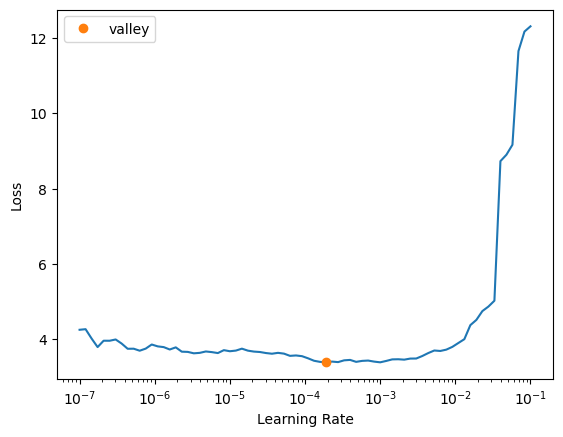

In [15]:
learn.lr_find()

In [16]:
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3596: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


(3, tensor(4.0619, grad_fn=<NllLossBackward0>), torch.Size([2, 42, 50264]))

In [17]:
learn.fit_one_cycle(1, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

ReadTimeout: Exception occured in `Seq2SeqMetricsCallback` when calling event `after_validate`:
	HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10.0)

In [18]:
learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,your content and conductas a youtube account holder you may submit content to the service including videos and user comments. you understand that youtube does not guarantee any confidentiality with respect to any content you submit. you shall be solely responsible for your own content and the consequences of submitting and publishing your content on the service. you affirm represent and warrant that you own or have the necessary licenses rights consents and permissions to publish content you submit and you license to youtube all patent trademark trade secret copyright or other proprietary rights in and to such content for publication on the service pursuant to these terms of service. for clarity you retain all of your ownership rights in your content. however by submitting content to youtube you hereby grant youtube a worldwide non exclusive royalty free sublicenseable and transferable license to use reproduce distribute prepare derivative works of display and perform the content in connection with the service and youtube s and its successors and affiliates business including without limitation for promoting and redistributing part or all of the service and derivative works thereof in any media formats and through any media channels. you also hereby grant each user of the service a non exclusive license to access your content through the service and to use reproduce distribute display and perform such content as permitted through the functionality of the service and under these terms of service. the,you are responsible for your uploaded content. don t violate copyright laws. our community guidelines define what we don t want you to submit.,"[ as a youtube account holder you may submit content to the service including videos and user comments. you grant youtube a worldwide non exclusive royalty free sublicenseable and transferable license to use reproduce distribute prepare derivative works of display and perform the content. you retain all of your ownership rights in your content., you and valve agree to resolve all disputes and claims between us in individual binding arbitration. this applies regardless of whether such claims are based in contract tort statute fraud unfair competition misrepresentation or any other legal theory. if you live in the european union this section 11 does not apply to you.]"


In [19]:
test_article = """
subject to your compliance with these terms niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile 
device and to run such copy of the app solely for your own personal noncommercial purposes. except as expressly permitted in these terms you may not a copy modify or create derivative
works based on the app b distribute transfer sublicense lease lend or rent the app to any third party c reverse engineer decompile or disassemble the app or d make the functionality of 
the app available to multiple users through any means. niantic reserves all rights in and to the app not expressly granted to you under these terms. if you accessed or downloaded the app
from the apple store then you agree to use the app only a on an apple branded product or device that runs ios apple s proprietary operating system software and b as permitted by the 
usage rules set forth in the apple store terms of service. if you accessed or downloaded the app from any app store or distribution platform like the apple store google play or amazon 
appstore each an app provider then you acknowledge and agree that these terms are concluded between you and niantic and not with app provider and that as between us and the app provider
niantic is solely responsible for the app. app provider has no obligation to furnish any maintenance and support services with respect to the app. in the event of any failure of the app 
to conform to any applicable warranty you may notify app provider and app provider will refund the purchase price for the app to you if applicable and to the maximum extent permitted by 
applicable law app provider will have no other warranty obligation whatsoever with respect to the app. any other claims losses liabilities damages costs or expenses attributable to any
failure of an app to conform to any warranty will be the sole responsibility of niantic. app provider is not responsible for addressing any claims you have or any claims of any third 
party relating to the app or your possession and use of the app including but not limited to i product liability claims ii any claim that the app fails to conform to any applicable legal
or regulatory requirement and iii claims arising under consumer protection or similar legislation. in the event of any third party claim that the app or your possession and use of the 
app infringes that third party s intellectual property rights niantic will be solely responsible for the investigation defense settlement and discharge of any such intellectual property
infringement claim to the extent required by these terms. app provider and its subsidiaries are third party beneficiaries of these terms as related to your license of the app and that 
upon your acceptance of the terms and conditions of these terms app provider will have the right and will be deemed to have accepted the right to enforce these terms as related to your
license of the app against you as a third party beneficiary thereof. you must also comply with all applicable third party terms of service when using the app. you agree to comply with 
all u s and foreign export laws and regulations to ensure that neither the app nor any technical data related thereto nor any direct product thereof is exported or re exported directly 
or indirectly in violation of or used for any purposes prohibited by such laws and regulations. by using the app you represent and warrant that i you are not located in a country that is 
subject to a u s government embargo or that has been designated by the u s government as a terrorist supporting country and ii you are not listed on any u s government list of prohibited 
r restricted parties.
"""

In [20]:
outputs = learn.blurr_summarize(test_article, early_stopping=True, num_beams=4, num_return_sequences=3)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

/home/aarushi/anaconda3/envs/summarize/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (142) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


=== Prediction 1 ===
{'summary_texts': [' you agree to use the app only on an apple branded product or device that runs apple s proprietary operating system software. niantic reserves all rights in and to the app not expressly granted to you under these terms. in the event of any failure of the app you may notify app provider and app provider will refund the purchase price for the app.', ' you agree to use the app only on an apple branded product or device that runs apple s proprietary operating system software. niantic reserves all rights in and to the app not expressly granted to you under these terms. in the event of any failure of the app  to conform to any applicable warranty you may notify app provider.', ' you agree to use the app only on an apple branded product or device that runs apple s proprietary operating system software. niantic reserves all rights in and to the app not expressly granted to you under these terms. in the event of any failure of the app to conform to any a

In [21]:
learn.metrics = None
learn.export(fname='ft_cnndm_export.pkl')

In [22]:
inf_learn = load_learner(fname='ft_cnndm_export.pkl')
inf_learn.blurr_summarize(test_article)

[{'summary_texts': ' you agree to use the app only on an apple branded product or device that runs apple s proprietary operating system software. niantic reserves all rights in and to the app not expressly granted to you under these terms. in the event of any failure of the app you may notify app provider and app provider will refund the purchase price for the app.'}]

https://ohmeow.com/posts/2020/05/23/text-generation-with-blurr.html

https://github.com/facebookresearch/fairseq/blob/main/examples/bart/README.md

In [2]:
#Create mini-batch and define parameters
hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, 
                                              task='summarization',
                                              text_gen_kwargs= {
                                                  'max_length': 248,
                                                  'min_length': 56,
                                                  'do_sample': False, 
                                                  'early_stopping': True, 
                                                  'num_beams': 4, 
                                                  'temperature': 1.0,
                                                  'top_k': 50, 
                                                  'top_p': 1.0, 
                                                  'repetition_penalty': 1.0, 
                                                  'bad_words_ids': None, 
                                                  'bos_token_id': 0, 
                                                  'pad_token_id': 1,
                                                  'eos_token_id': 2, 
                                                  'length_penalty': 2.0, 
                                                  'no_repeat_ngram_size': 3,
                                                  'encoder_no_repeat_ngram_size': 0,
                                                  'num_return_sequences': 1, 
                                                  'decoder_start_token_id': 2, 
                                                  'use_cache': True,
                                                  'num_beam_groups': 1,
                                                  'diversity_penalty': 0.0, 
                                                  'output_attentions': False, 
                                                  'output_hidden_states': False, 
                                                  'output_scores': False,
                                                  'return_dict_in_generate': False,
                                                  'forced_bos_token_id': 0, 
                                                  'forced_eos_token_id': 2, 
                                                  'remove_invalid_values': False})

NameError: name 'HF_Seq2SeqBeforeBatchTransform' is not defined

In [19]:
#Prepare data for training
blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('original_text'), get_y=ColReader('title'), splitter=RandomSplitter())
dls = dblock.dataloaders(df, batch_size = 2)

NameError: name 'HF_Seq2SeqBlock' is not defined

In [13]:
from transformers import pipeline

In [14]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [15]:
article = """
subject to your compliance with these terms niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile 
device and to run such copy of the app solely for your own personal noncommercial purposes. except as expressly permitted in these terms you may not a copy modify or create derivative
works based on the app b distribute transfer sublicense lease lend or rent the app to any third party c reverse engineer decompile or disassemble the app or d make the functionality of 
the app available to multiple users through any means. niantic reserves all rights in and to the app not expressly granted to you under these terms. if you accessed or downloaded the app
from the apple store then you agree to use the app only a on an apple branded product or device that runs ios apple s proprietary operating system software and b as permitted by the 
usage rules set forth in the apple store terms of service. if you accessed or downloaded the app from any app store or distribution platform like the apple store google play or amazon 
appstore each an app provider then you acknowledge and agree that these terms are concluded between you and niantic and not with app provider and that as between us and the app provider
niantic is solely responsible for the app. app provider has no obligation to furnish any maintenance and support services with respect to the app. in the event of any failure of the app 
to conform to any applicable warranty you may notify app provider and app provider will refund the purchase price for the app to you if applicable and to the maximum extent permitted by 
applicable law app provider will have no other warranty obligation whatsoever with respect to the app. any other claims losses liabilities damages costs or expenses attributable to any
failure of an app to conform to any warranty will be the sole responsibility of niantic. app provider is not responsible for addressing any claims you have or any claims of any third 
party relating to the app or your possession and use of the app including but not limited to i product liability claims ii any claim that the app fails to conform to any applicable legal
or regulatory requirement and iii claims arising under consumer protection or similar legislation. in the event of any third party claim that the app or your possession and use of the 
app infringes that third party s intellectual property rights niantic will be solely responsible for the investigation defense settlement and discharge of any such intellectual property
infringement claim to the extent required by these terms. app provider and its subsidiaries are third party beneficiaries of these terms as related to your license of the app and that 
upon your acceptance of the terms and conditions of these terms app provider will have the right and will be deemed to have accepted the right to enforce these terms as related to your
license of the app against you as a third party beneficiary thereof. you must also comply with all applicable third party terms of service when using the app. you agree to comply with 
all u s and foreign export laws and regulations to ensure that neither the app nor any technical data related thereto nor any direct product thereof is exported or re exported directly 
or indirectly in violation of or used for any purposes prohibited by such laws and regulations. by using the app you represent and warrant that i you are not located in a country that is 
subject to a u s government embargo or that has been designated by the u s government as a terrorist supporting country and ii you are not listed on any u s government list of prohibited 
r restricted parties.
"""

In [16]:
print(summarizer(article, max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Niantic grants you a limited nonexclusive nontransferable non sublicensable license to download and install a copy of the app on a mobile  \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0device. You agree to use the app only on an apple branded product or device that runs ios apple s proprietary operating system software and as permitted by the apple store terms of service.'}]
